In [16]:
import pandas as pd
from utils import get_model_performance, query_answer_to_clean_df
from models_to_eval import models as models_to_eval
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
model_evals = []
for model in models_to_eval:
    result = get_model_performance(model)
    model_evals.append(query_answer_to_clean_df(result))

In [25]:
# Some parameters
MIN_ROUND = 471
TO_ANALYSE = ["v2_corr20", "tc"]

###
metrics = {}

In [26]:
for model_eval in model_evals:
    evals_filtered = model_eval[model_eval["roundNumber"] >= MIN_ROUND]
    model_name = evals_filtered["model_name"].unique()[0]
    metrics[model_name] = {}
    for metric in TO_ANALYSE:
        metrics[model_name]["mean_" + metric] = evals_filtered[metric].mean()
        metrics[model_name]["sharp_ratio_" + metric] = (
            evals_filtered[metric].mean() / evals_filtered[metric].std()
        )

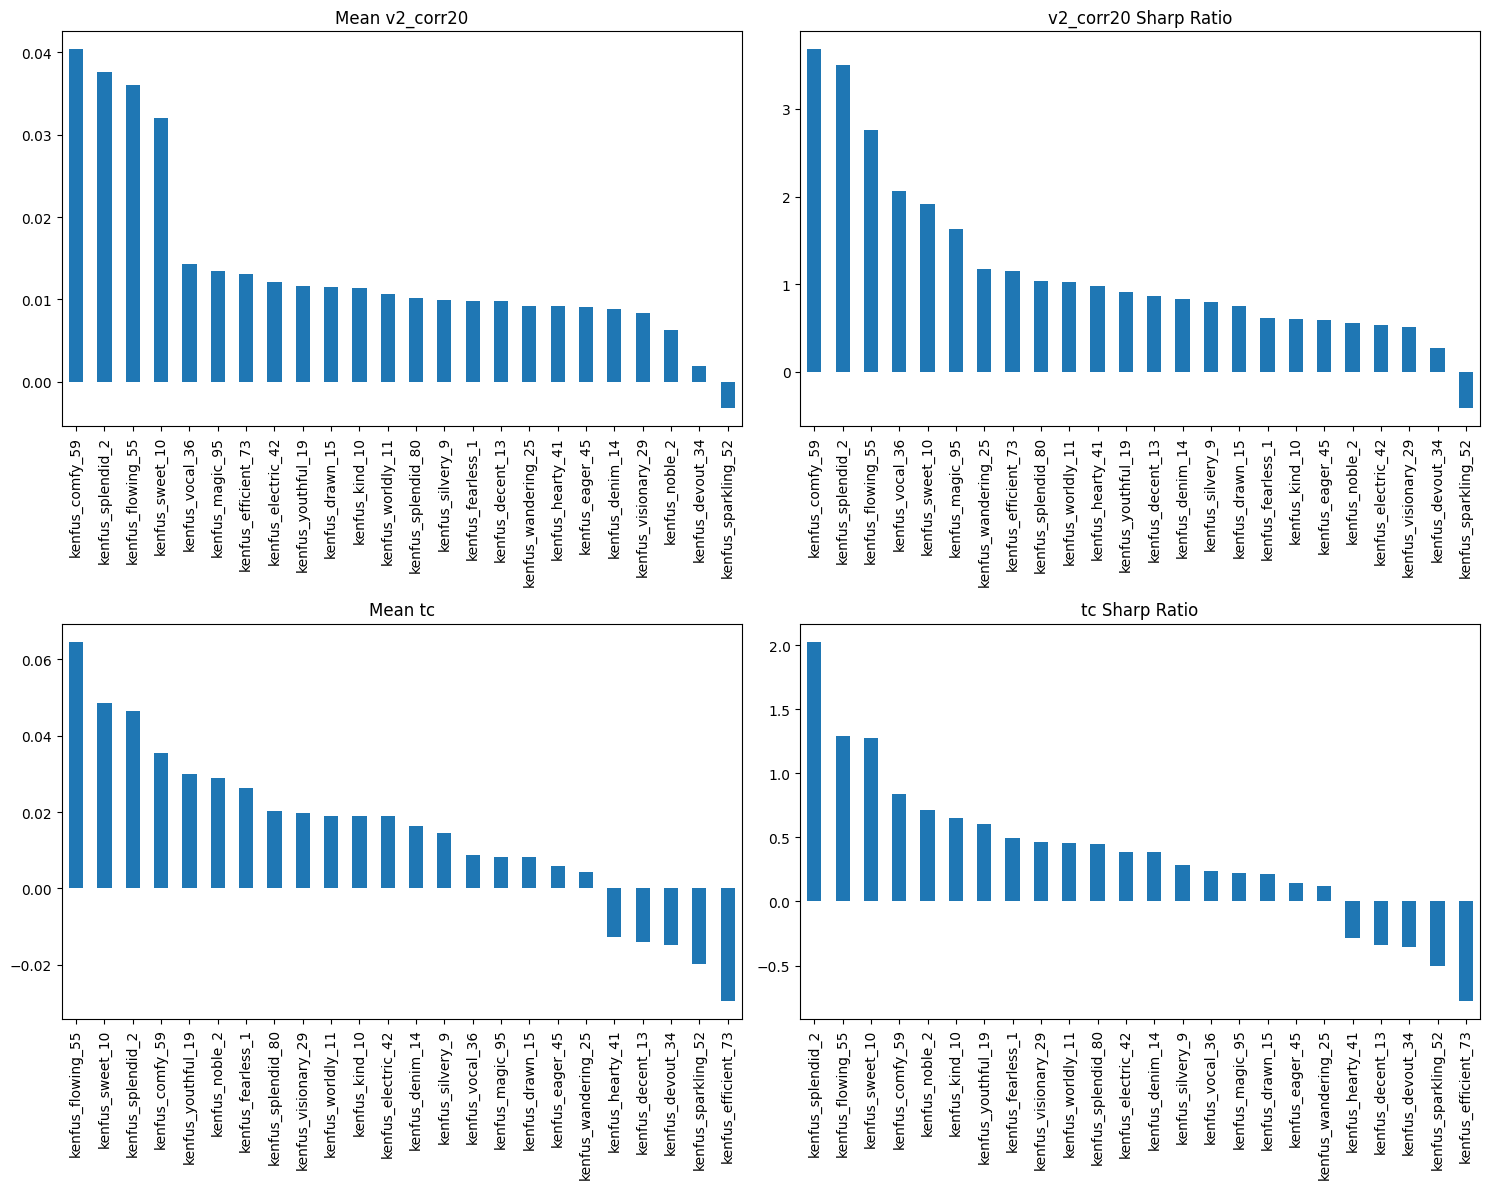

In [33]:
# Convert data into a DataFrame
df = pd.DataFrame.from_dict(metrics, orient="index")

# Plot each metric in a separate subplot
fig, axes = plt.subplots(
    nrows=len(TO_ANALYSE), ncols=2, figsize=(15, 6 * len(TO_ANALYSE))
)

for i, metric in enumerate(TO_ANALYSE):
    df.sort_values(by="mean_" + metric, ascending=False)["mean_" + metric].plot(
        kind="bar", ax=axes[i][0], title="Mean " + metric
    )
    df.sort_values(by="sharp_ratio_" + metric, ascending=False)[
        "sharp_ratio_" + metric
    ].plot(kind="bar", ax=axes[i][1], title=metric + " Sharp Ratio")

plt.tight_layout()
plt.show()